In [165]:
from pyod.utils.data import generate_data
from pyod.models.ocsvm import OCSVM
from pyod.models.deep_svdd import DeepSVDD
from sklearn.metrics import balanced_accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

seed = 42

In [166]:
contamination = 0.15
X_train, X_test, y_train, y_test = generate_data(n_train=300, n_test=200, n_features=3, contamination=contamination, random_state=seed)     

In [167]:
model = OCSVM(contamination=0.3, kernel='linear')
model.fit(X_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

balanced_acc = balanced_accuracy_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_test)

print(f"Balanced Accuracy: {balanced_acc}")
print(f"ROC AUC Score: {roc_auc}")

Balanced Accuracy: 0.9323529411764706
ROC AUC Score: 0.9323529411764706


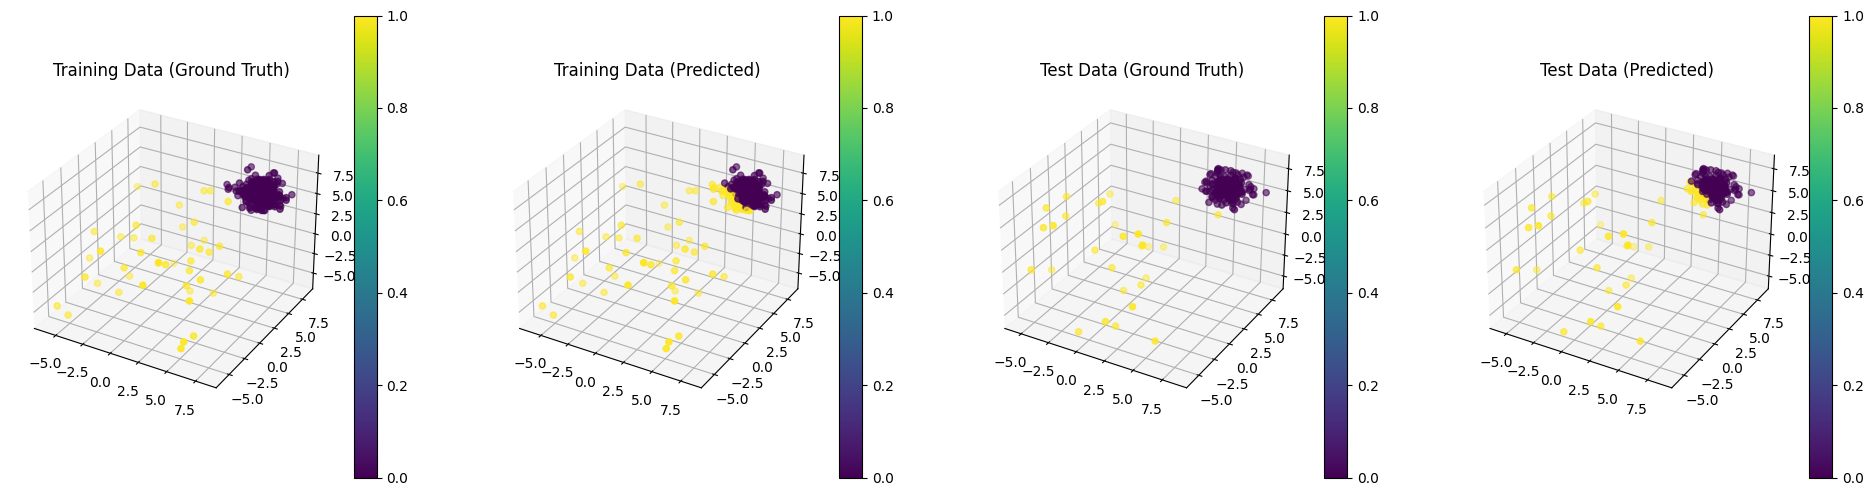

In [168]:
def plot_data(X_train, X_test, y_train, y_pred_train, y_pred_test):
    fig, axs = plt.subplots(1, 4, figsize=(24, 6), subplot_kw={'projection': '3d'})
    c0 = axs[0].scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train)
    c1 = axs[1].scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_pred_train)
    c2 = axs[2].scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_test)
    c3 = axs[3].scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=y_pred_test)

    axs[0].set_title('Training Data (Ground Truth)')
    axs[1].set_title('Training Data (Predicted)')
    axs[2].set_title('Test Data (Ground Truth)')
    axs[3].set_title('Test Data (Predicted)')

    plt.colorbar(c0, ax=axs[0])
    plt.colorbar(c1, ax=axs[1])
    plt.colorbar(c2, ax=axs[2])
    plt.colorbar(c3, ax=axs[3])


plot_data(X_train, X_test, y_train, y_pred_train, y_pred_test)


### RBF Kernel

Balanced Accuracy RBF: 0.8852941176470588
ROC AUC Score RBF: 0.8852941176470589
Number of different predictions training set: 60
Number of different predictions test set: 50


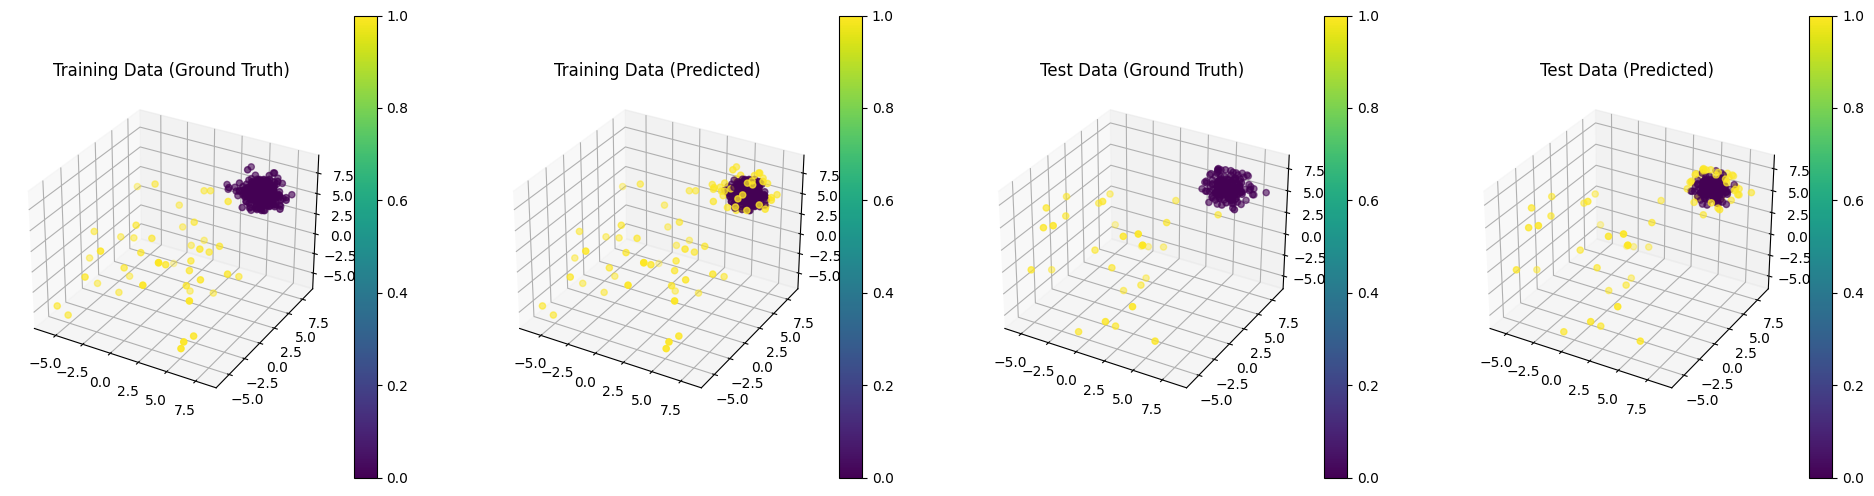

In [169]:
model = OCSVM(contamination=0.30, kernel='rbf')
model.fit(X_train)

y_pred_train_rbf = model.predict(X_train)
y_pred_test_rbf = model.predict(X_test)

balanced_acc_rbf = balanced_accuracy_score(y_test, y_pred_test_rbf)
roc_auc_rbf = roc_auc_score(y_test, y_pred_test_rbf)

print(f"Balanced Accuracy RBF: {balanced_acc_rbf}")
print(f"ROC AUC Score RBF: {roc_auc_rbf}")

print(f"Number of different predictions training set: {np.sum(y_pred_train != y_pred_train_rbf)}")
print(f"Number of different predictions test set: {np.sum(y_pred_test != y_pred_test_rbf)}")

plot_data(X_train, X_test, y_train, y_pred_train_rbf, y_pred_test_rbf)

### DeepSVDD

In [170]:
model = DeepSVDD(contamination=0.3, n_features=3)
model.fit(X_train)

y_pred_train_deep = model.predict(X_train)
y_pred_test_deep = model.predict(X_test)

balanced_acc_deep = balanced_accuracy_score(y_test, y_pred_test_deep)
roc_auc_deep = roc_auc_score(y_test, y_pred_test_deep)

print(f"Balanced Accuracy DeepSVDD: {balanced_acc_deep}")
print(f"ROC AUC Score DeepSVDD: {roc_auc_deep}")

Epoch 1/100, Loss: 11.76184493303299
Epoch 2/100, Loss: 10.118531078100204
Epoch 3/100, Loss: 10.350427091121674
Epoch 4/100, Loss: 10.779710292816162
Epoch 5/100, Loss: 10.048340186476707
Epoch 6/100, Loss: 10.316711962223053
Epoch 7/100, Loss: 10.129144161939621
Epoch 8/100, Loss: 12.189339756965637
Epoch 9/100, Loss: 11.026189893484116
Epoch 10/100, Loss: 10.292965710163116
Epoch 11/100, Loss: 10.702756762504578
Epoch 12/100, Loss: 10.53536707162857
Epoch 13/100, Loss: 10.198305249214172
Epoch 14/100, Loss: 10.160101622343063
Epoch 15/100, Loss: 10.580323100090027
Epoch 16/100, Loss: 10.240971624851227
Epoch 17/100, Loss: 10.51849302649498
Epoch 18/100, Loss: 10.765838861465454
Epoch 19/100, Loss: 10.030022129416466
Epoch 20/100, Loss: 10.13046059012413
Epoch 21/100, Loss: 10.059353724122047
Epoch 22/100, Loss: 10.22968277335167
Epoch 23/100, Loss: 10.187980622053146
Epoch 24/100, Loss: 10.286814957857132
Epoch 25/100, Loss: 10.025567039847374
Epoch 26/100, Loss: 10.54933899641037
E

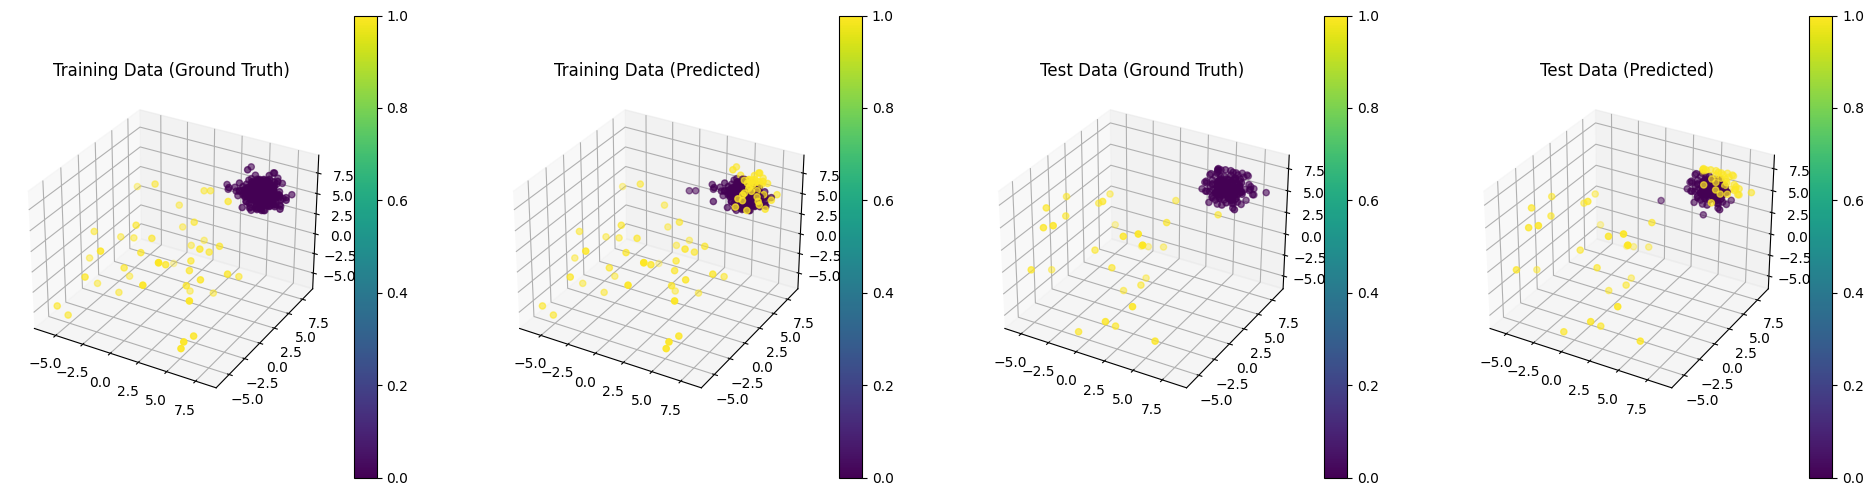

In [171]:
plot_data(X_train, X_test, y_train, y_pred_train_deep, y_pred_test_deep)